### K-Nearest Neigbors

**Problem Statement**

Data : Iris.csv The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. KNN model is performed to check the accuracy.
Note:
Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


In [1]:
# import the libraries
import pandas as pd

In [2]:
iris_data= pd.read_csv ("E:\Sankhyana Training\Datasets\iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the total number of rows and columns
iris_data.shape

(150, 6)

In [4]:
# checking for null values
iris_data.isnull().sum()

Id                0
SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm    10
PetalWidthCm      0
Species           0
dtype: int64

In [7]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,140.0,3.809286,1.762025,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
# imputing the missing values
import numpy as np
iris_data1 = iris_data.fillna(np.mean(iris_data["PetalLengthCm"]))

In [9]:
iris_data1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris_data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# deleting the id column

iris_data2 = iris_data1.drop (['Id'], axis =1)

In [12]:
iris_data2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# checking uniques species on the Species column

iris_data2.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

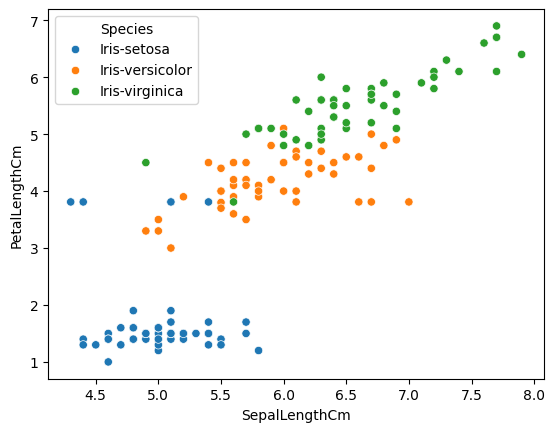

In [15]:
## Ploting a scatter plot to see the relationship between sepalLength and PetalLength for the different species
import seaborn as sns

sns.scatterplot(x ='SepalLengthCm' , y = "PetalLengthCm" , data = iris_data2, hue = 'Species' )

In [16]:
# encording the species strings to numerical values using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
# encode
iris_data2['Species'] = le.fit_transform (iris_data2['Species'])

In [18]:
iris_data2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris_data2.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [20]:
# selecting the input features and target feature

data = iris_data2.iloc[:, :4 ]
target = iris_data2.iloc[:, 4]

In [21]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# spliting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.3)

In [36]:
# imorting the algorithim and creating an object iof the algorithm
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier (n_neighbors = 5, metric = 'euclidean')

In [37]:
# trainng the model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [39]:
# making the prediction using predict method
pred = knn_model.predict(X_test)

In [41]:
# checking the model accuracy
from sklearn.metrics  import accuracy_score
accuracy_score(pred, Y_test)*100

93.33333333333333